In [117]:
import numpy as np
import pandas as pd

In [157]:
import datetime as datetime
df_index = pd.date_range('2012-10-01', periods=200, freq='1d')
df = pd.DataFrame(df_index, columns=['dt'])

x = np.linspace(0, 20, 200)

# stationary
df['val'] = np.sin(x) + np.random.normal(size=200, scale=0.5)
df['sin'] = np.sin(x)
df = df.set_index('dt')

# non-stationary
#df['val'] = x/10 + np.sin(x) + np.random.normal(size=200, scale=0.5)

df.head()

,val,sin
dt,,
2012-10-01,-0.130092,0.000000
2012-10-02,0.486562,0.100333
2012-10-03,0.041915,0.199654
2012-10-04,0.070498,0.296960
2012-10-05,0.903610,0.391269


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context='notebook')

## Тест Дики-Фулера

Выдвигаем гипотезу, что ряд нестационарный. Дальше ищем единичные корни (_TODO: почитать, что это такое_). Если единичные корни есть, то p-value получится довольно большим (0.1 и более). В данном случае для стационарного ряда получаем $p = 0.003$ и меньше, для стационарного: $p=0.23$ и больше.

In [169]:
# plot rolling meean, std
def plot_ma(df):
    df_roll_mean = pd.rolling_mean(df.val, window=10)
    df_roll_std = pd.rolling_std(df.val, window=10)
    ax = plt.plot(df_roll_mean, label='roll mean, window=20')
    plt.plot(df_roll_std, label='roll std, window=20')
    plt.plot(df.val, color='r', label='Original', alpha=0.3)
    plt.legend(loc='best')

In [170]:
# dickey fuller test
def df_test(df):
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(df.val)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Test Statistic                  -4.610588
p-value                          0.000123
#Lags Used                      14.000000
Number of Observations Used    185.000000
Critical Value (5%)             -2.877293
Critical Value (1%)             -3.466201
Critical Value (10%)            -2.575168
dtype: float64


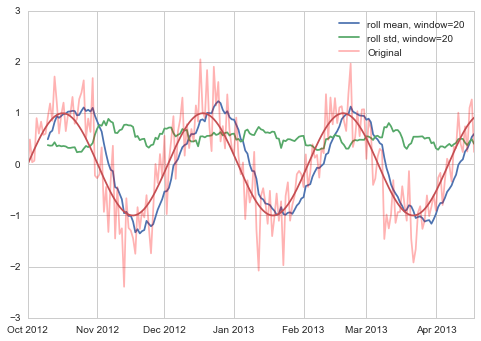

In [171]:
plot_ma(df)
df_test(df)
plt.plot(df.sin, label='Original, no noise')

In [125]:
from sklearn import metrics